#Leaukemia detection using Soft Computing Techniques

##Importing Libraries to be used 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [0]:
! git clone https://github.com/RhythemNagpal/leukemia_detector.git

fatal: destination path 'leukemia_detector' already exists and is not an empty directory.


In [0]:
patients = pd.read_csv('leukemia_detector/leukemiaPatients.csv',header=None)
patients.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,1,-4,-116,-125,241,-191,-411,-31,-240,150,24,19,-669,-664,-311,297,353,-96,-291,17878,21,218,-103,52,-242,134,-105,-207,-42,-59,-39,-183,77,-495,-124,-111,51,132,647,1065,...,303,-559,317,585,546,328,16876,13859,1102,375,-105,10547,10235,685,4431,-210,18,403,-31,207,135,86,-228,216,120,247,399,-220,-1651,429,173,755,-23,573,42,987,279,22,662,-46
1,1,15,-114,2,193,-51,-155,29,-105,42,524,-70,-344,-285,-53,38,-142,-125,-118,26052,-67,121,-69,6,-198,61,-93,-190,-18,-49,-66,-117,-38,-262,-106,-133,-95,-22,202,442,...,99,-17,190,119,390,151,9184,19228,374,61,131,9355,11461,-95,1028,-142,-26,58,-2,113,-30,54,-71,95,59,19,45,-78,-887,314,173,492,54,277,-13,279,51,6,2484,-2
2,1,-318,-192,-95,312,-139,-344,324,-237,105,167,-50,-820,-231,-273,208,99,-126,-534,11983,-81,114,-67,32,-162,175,-20,-109,31,-23,-21,-246,-31,-589,-353,-314,-435,135,423,45,...,233,12,1034,55,630,1835,21787,15527,385,196,-253,13538,14783,104,3624,-242,-97,386,59,308,32,60,-326,139,-118,247,192,-394,-1634,208,225,737,63,472,33,737,227,-9,371,-31
3,1,-32,-49,49,230,-367,-508,-349,-194,34,-56,147,-841,-657,-240,-15,227,-166,-453,23508,-126,61,-35,45,-94,125,-125,-171,66,-56,-68,-217,-48,-775,-235,-266,-125,85,295,9042,...,187,-453,338,-39,358,391,21617,17676,852,74,245,10144,9846,190,2633,-230,20,207,-20,132,27,53,-205,319,149,281,306,-442,-2404,385,36,592,57,215,-22,588,361,-26,133,-32
4,1,-124,-79,-37,330,-188,-423,-31,-223,-82,176,226,-1010,-513,-333,30,177,-69,-411,17996,20,371,-68,6,-134,111,-44,-232,-7,-144,-56,-217,17,-657,-332,-277,-36,123,532,5199,...,385,-1025,705,9230,665,925,24514,14574,1338,67,-56,10373,9002,745,2842,-348,111,330,-19,295,80,109,-54,388,172,292,205,-396,-2525,688,348,938,-15,433,-2,1170,284,39,298,-3


In [0]:
print(patients.shape)
x=patients.iloc[:,1:]
y=patients.iloc[:,0]

(72, 7130)


In [0]:
mp={1.0:"Yes",-1.0:"No"}
y=y.map(mp)
print(y)
print(y_mp)

0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
     ... 
67     No
68     No
69     No
70     No
71     No
Name: 0, Length: 72, dtype: object
0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
     ... 
67     No
68     No
69     No
70     No
71     No
Name: 0, Length: 72, dtype: object


##Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

##Scalling Features

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Logistic Regression

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_LR=logreg.predict(X_test)
print("Test set predictions:\n{}".format(y_pred_LR))

Test set predictions:
['Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No']


In [0]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.91


In [0]:
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))

[[16  1]
 [ 1  4]]
              precision    recall  f1-score   support

          No       0.94      0.94      0.94        17
         Yes       0.80      0.80      0.80         5

    accuracy                           0.91        22
   macro avg       0.87      0.87      0.87        22
weighted avg       0.91      0.91      0.91        22



###Support Vector Machine

In [0]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svm=svm.predict(X_test)
print("Test set predictions:\n{}".format(y_pred_svm))

Test set predictions:
['Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No']


In [0]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.82


In [0]:
pred_svm = svm.predict(X_test)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))


[[14  3]
 [ 1  4]]
              precision    recall  f1-score   support

          No       0.93      0.82      0.87        17
         Yes       0.57      0.80      0.67         5

    accuracy                           0.82        22
   macro avg       0.75      0.81      0.77        22
weighted avg       0.85      0.82      0.83        22



###KNearestNeighbours

In [0]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
y_pred_knn=knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred_knn))

Test set predictions:
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No']


In [0]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.80
Accuracy of KNN classifier on test set: 0.73


([<matplotlib.axis.XTick at 0x7f316db3e240>,
 <a list of 5 Text major ticklabel objects>)

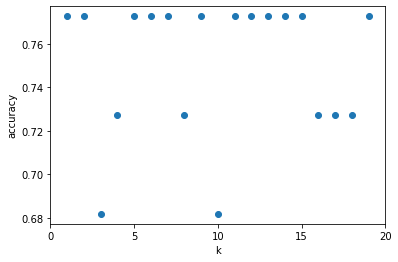

In [0]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [0]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[16  1]
 [ 4  1]]
              precision    recall  f1-score   support

          No       0.80      0.94      0.86        17
         Yes       0.50      0.20      0.29         5

    accuracy                           0.77        22
   macro avg       0.65      0.57      0.58        22
weighted avg       0.73      0.77      0.73        22



###Decision Tree

In [0]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred_dtree = dtree.predict(X_test)
print("Test set predictions:\n{}".format(pred_dtree))

Test set predictions:
['Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [0]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.82


In [0]:
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test, pred_dtree))

[[16  1]
 [ 3  2]]
              precision    recall  f1-score   support

          No       0.84      0.94      0.89        17
         Yes       0.67      0.40      0.50         5

    accuracy                           0.82        22
   macro avg       0.75      0.67      0.69        22
weighted avg       0.80      0.82      0.80        22



###Random Forest 

In [0]:
forest=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
pred_forest=forest.predict(X_test)
print("Test set predictions:\n{}".format(pred_forest))

Test set predictions:
['Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [0]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(forest.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(forest.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.91


In [0]:
print(confusion_matrix(y_test, pred_forest))
print(classification_report(y_test, pred_forest))


[[17  0]
 [ 2  3]]
              precision    recall  f1-score   support

          No       0.89      1.00      0.94        17
         Yes       1.00      0.60      0.75         5

    accuracy                           0.91        22
   macro avg       0.95      0.80      0.85        22
weighted avg       0.92      0.91      0.90        22

